Ops Analytics

Load telemetry data and clean up irrelevant attributes

In [230]:
import os
import tarfile
import urllib
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [283]:
file_path = os.path.join("datasets", "sqlops_telemetry","")

def load_data(data_path = file_path, csv_file="dbo.carbonPerf.csv"):
    csv_path = os.path.join(data_path, csv_file)
    return pd.read_csv(csv_path)

ops_df = load_data(file_path)
valid_attributes = ["Platform", "AppVersion", "TotalMemory", "CPUCount", "Ellapsed"]
ops_df = ops_df[valid_attributes]
ops_df.dropna(subset=["Ellapsed"], inplace=True)
positive_value_indices = np.where(ops_df["Ellapsed"]>0)
ops_df = ops_df.iloc[positive_value_indices]
ops_df["Ellapsed"] = np.ceil(ops_df["Ellapsed"]/1000)
ops_df["Ellapsed"].where(ops_df["Ellapsed"] < 20, 20.0, inplace=True)
ops_df["TotalMemory"] = np.ceil(ops_df["TotalMemory"] / (1024**3))
ops_df["TotalMemory"].where(ops_df["TotalMemory"] < 256, 256, inplace=True)
ops_df["CPUCount"].where(ops_df["CPUCount"] < 20, 20.0, inplace=True )
ops_df["CPUCount"] = np.ceil(ops_df["CPUCount"])
stack = ops_df[["Platform", "AppVersion"]].stack()
ops_df[["Platform", "AppVersion"]] = pd.Series(stack.factorize()[0], index=stack.index).unstack()

linux_indices = np.where(ops_df["Platform"]==7)
linux_df = ops_df.iloc[linux_indices]

windows_indices= np.where(ops_df["Platform"]==12)
windows_df = ops_df.iloc[windows_indices]

mac_indices = np.where(ops_df["Platform"]==0)
mac_df = ops_df.iloc[mac_indices]

In [284]:
linux_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,63768.0,63768.000000,63768.000000,63768.000000,63768.000000
mean,7.0,3.161272,13.626333,6.119433,5.641921
std,0.0,1.929796,5.622469,2.111224,4.178602
min,7.0,1.000000,2.000000,2.000000,1.000000
25%,7.0,2.000000,8.000000,4.000000,3.000000
50%,7.0,2.000000,16.000000,8.000000,4.000000
75%,7.0,5.000000,16.000000,8.000000,6.000000
max,7.0,26.000000,128.000000,20.000000,20.000000


In [285]:
windows_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,108442.0,108442.000000,108442.000000,108442.000000,108442.000000
mean,12.0,3.274755,14.961583,5.619087,10.194500
std,0.0,2.076143,12.441709,2.503274,6.145134
min,12.0,1.000000,1.000000,1.000000,1.000000
25%,12.0,2.000000,8.000000,4.000000,5.000000
50%,12.0,2.000000,16.000000,4.000000,9.000000
75%,12.0,6.000000,16.000000,8.000000,15.000000
max,12.0,28.000000,256.000000,20.000000,20.000000


In [286]:
mac_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,11976.0,11976.000000,11976.000000,11976.000000,11976.000000
mean,0.0,2.959419,11.885855,4.821393,7.032899
std,0.0,1.928541,8.325933,2.292785,5.877106
min,0.0,1.000000,1.000000,1.000000,1.000000
25%,0.0,2.000000,8.000000,4.000000,3.000000
50%,0.0,2.000000,8.000000,4.000000,4.000000
75%,0.0,4.000000,16.000000,4.000000,10.000000
max,0.0,21.000000,126.000000,20.000000,20.000000


In [287]:
ops_df.head()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
0,0,1,4.0,2.0,20.0
1,0,1,8.0,2.0,7.0
2,0,1,16.0,8.0,2.0
3,0,1,4.0,4.0,12.0
4,0,1,4.0,2.0,8.0


In [288]:
ops_df["Ellapsed"].describe().apply(lambda x: format(x, 'f'))

count    184186.000000
mean          8.412757
std           5.930850
min           1.000000
25%           4.000000
50%           6.000000
75%          12.000000
max          20.000000
Name: Ellapsed, dtype: object

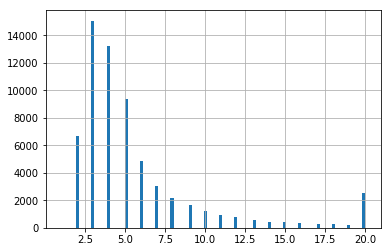

In [290]:
linux_df["Ellapsed"].hist(bins=100)

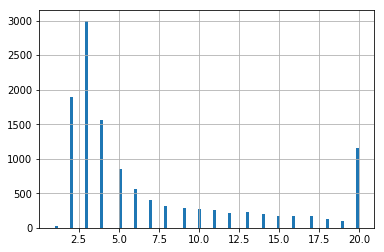

In [296]:
mac_df["Ellapsed"].hist(bins=100)

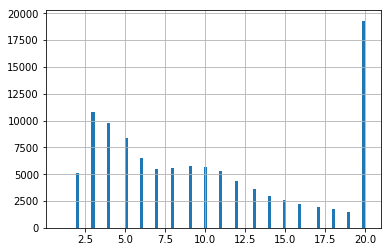

In [297]:
windows_df["Ellapsed"].hist(bins=100)

In [299]:
corr_matrix=linux_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.005086
TotalMemory   -0.197484
CPUCount      -0.251730
Platform            NaN
Name: Ellapsed, dtype: float64

In [300]:
corr_matrix=mac_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.057800
CPUCount      -0.215835
TotalMemory   -0.303499
Platform            NaN
Name: Ellapsed, dtype: float64

In [301]:
corr_matrix=windows_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.075707
TotalMemory   -0.187016
CPUCount      -0.216181
Platform            NaN
Name: Ellapsed, dtype: float64

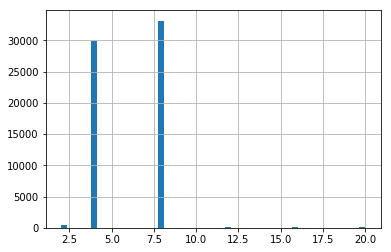

In [292]:
linux_df["CPUCount"].hist(bins=50)

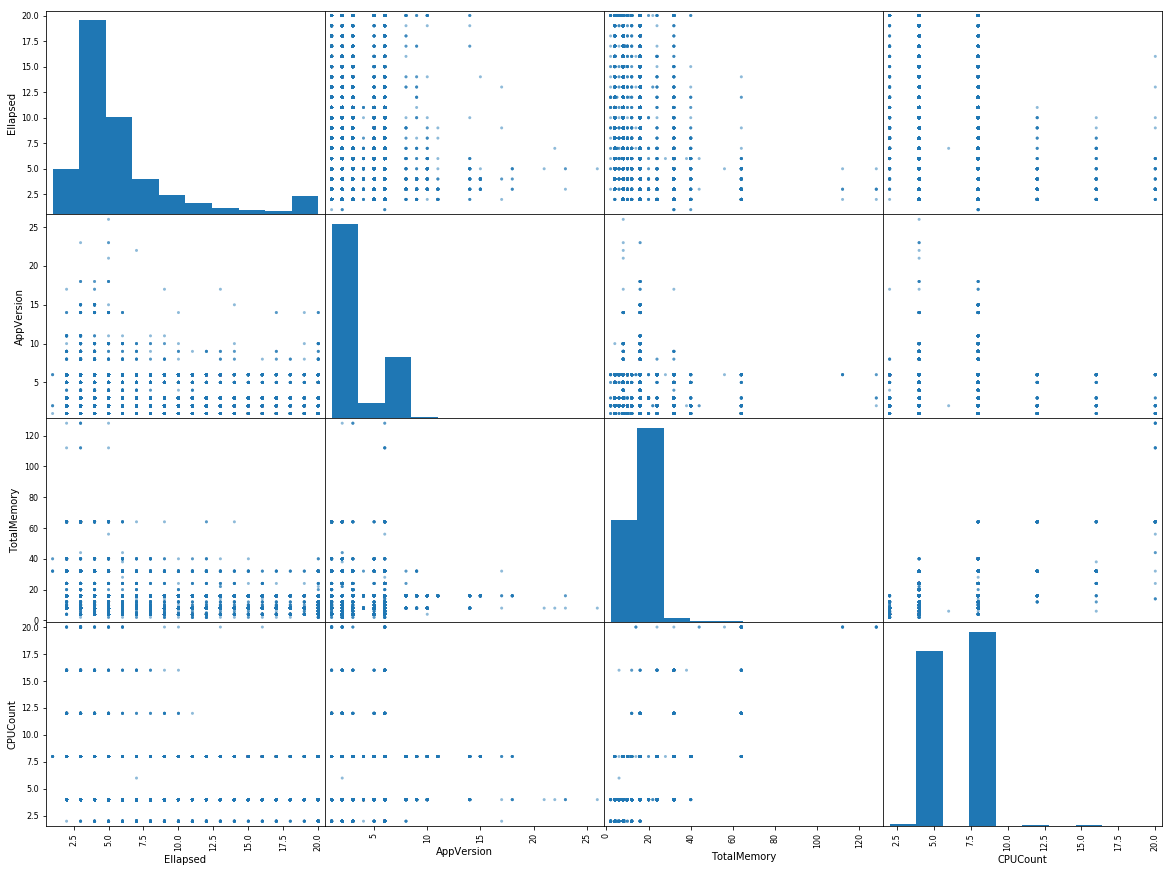

In [294]:
attributes = ["Ellapsed", "AppVersion", "TotalMemory", "CPUCount"]
scatter_matrix(linux_df[attributes], figsize=(20,15))
plt.show()